#DS 675-003 Fall 2023

MONIL JIGNESH SHAH (mjs283)

MEGHNA REDDI (mr96)

BHARGAVI REDDY KOTHA ( bk384 )

#Project Overview

Chicago Illinois has bikes available to rent all over the city called Divvy Bikes https://divvybikes.com/. In this project, the data comes from Chicago Divvy bicycle sharing system. The dataset contains 10 years (2013 to 2023 November) of trip data.

The trip data includes the following for each record:

1.the type of bike used, a classic pedal bike or pedal-assist electric bike

2.the start and end times of the trip

3.the start and end station information

4.the start and end GPS coordinates

5.the type rider, member or casual rider

We have tried several approaches on the data to understand the various use cases and their solutions.

1. Preprocessing : Data is passed through a uniform pipeline for cleaning
2. Exploratory Data Analysis : To understand the important insights in the data
3. Feature Extraction : Suitable features used in classification and the time series forecasting are generated here.
4. Mutual Information check : Analysing the data if it is suitable for any classification or regression tasks.
5. Time Series Analysis : Univariate and Multivariate forecasts are done based on the previous truth values as it is a sequential data.

## Data Processing and Exploration

The dataset has been taken from [https://divvy-tripdata.s3.amazonaws.com/index.html](https://divvy-tripdata.s3.amazonaws.com/index.html)

### Data Gathering & Exploration

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [4]:
# Common imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

import os

import warnings
warnings.filterwarnings('ignore')

In [5]:
sample_df = pd.read_csv("C:\\Users\\user\\Downloads\\202109-divvy-tripdata\\202109-divvy-tripdata.csv",parse_dates=['started_at','ended_at']) #picked up one month at random for data Exploration
sample_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NaN,NaN,NaN,NaN,41.89,-87.68,41.89,-87.67,casual
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NaN,NaN,NaN,NaN,41.94,-87.64,41.98,-87.67,casual
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NaN,NaN,NaN,NaN,41.81,-87.72,41.80,-87.72,casual
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NaN,NaN,NaN,NaN,41.80,-87.72,41.81,-87.72,casual
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NaN,NaN,NaN,NaN,41.88,-87.74,41.88,-87.71,casual


In [ ]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756147 entries, 0 to 756146
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             756147 non-null  object        
 1   rideable_type       756147 non-null  object        
 2   started_at          756147 non-null  datetime64[ns]
 3   ended_at            756147 non-null  datetime64[ns]
 4   start_station_name  663034 non-null  object        
 5   start_station_id    663036 non-null  object        
 6   end_station_name    656886 non-null  object        
 7   end_station_id      656886 non-null  object        
 8   start_lat           756147 non-null  float64       
 9   start_lng           756147 non-null  float64       
 10  end_lat             755552 non-null  float64       
 11  end_lng             755552 non-null  float64       
 12  member_casual       756147 non-null  object        
dtypes: datetime64[ns](2), float64

In [ ]:
sample_df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    93113
start_station_id      93111
end_station_name      99261
end_station_id        99261
start_lat                 0
start_lng                 0
end_lat                 595
end_lng                 595
member_casual             0
dtype: int64

###Feature Extraction

The existing features displayed above do not appear to offer valuable insights for analysis. Therefore, it is essential to generate new, meaningful features that can provide pertinent information and contribute to drawing conclusive findings. These meaningful features will likely facilitate a more insightful analysis and aid in reaching meaningful conclusions based on the data.

In [ ]:
sample_df['started_at'] = pd.to_datetime(sample_df.started_at)
sample_df['ended_at'] = pd.to_datetime(sample_df.ended_at)
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756147 entries, 0 to 756146
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             756147 non-null  object        
 1   rideable_type       756147 non-null  object        
 2   started_at          756147 non-null  datetime64[ns]
 3   ended_at            756147 non-null  datetime64[ns]
 4   start_station_name  663034 non-null  object        
 5   start_station_id    663036 non-null  object        
 6   end_station_name    656886 non-null  object        
 7   end_station_id      656886 non-null  object        
 8   start_lat           756147 non-null  float64       
 9   start_lng           756147 non-null  float64       
 10  end_lat             755552 non-null  float64       
 11  end_lng             755552 non-null  float64       
 12  member_casual       756147 non-null  object        
dtypes: datetime64[ns](2), float64

In [ ]:
#Duration of ride
sample_df['ride_duration_seconds'] = (sample_df.ended_at - sample_df.started_at) / np.timedelta64(1, 's')
sample_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_seconds
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:00,2021-09-28 16:09:00,NaN,NaN,NaN,NaN,41.89,-87.68,41.89,-87.67,casual,120.0
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:00,2021-09-28 14:40:00,NaN,NaN,NaN,NaN,41.94,-87.64,41.98,-87.67,casual,960.0
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:00,2021-09-28 00:23:00,NaN,NaN,NaN,NaN,41.81,-87.72,41.80,-87.72,casual,180.0
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:00,2021-09-28 15:00:00,NaN,NaN,NaN,NaN,41.80,-87.72,41.81,-87.72,casual,540.0
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:00,2021-09-28 10:03:00,NaN,NaN,NaN,NaN,41.88,-87.74,41.88,-87.71,casual,600.0


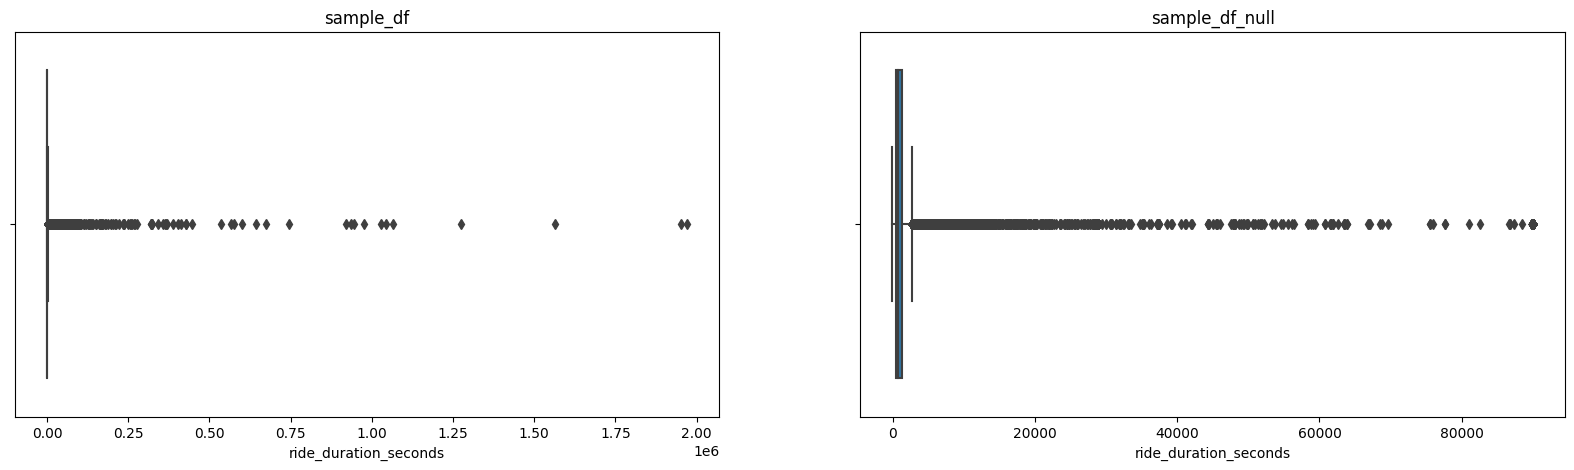

In [ ]:
#here we are looking at the distribution of ride_duration_seconds in the entire data set as well as among the subset with missing values:
sample_df_null = sample_df[sample_df.isnull().any(axis = 1)]
fig, axs = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data=sample_df, x='ride_duration_seconds', ax=axs[0])
axs[0].set_title("sample_df")
sns.boxplot(data=sample_df_null, x='ride_duration_seconds', ax=axs[1])
axs[1].set_title("sample_df_null");

Certainly! The IQR rule flags numerous records as outliers, but it's important to note that not all of them are necessarily incorrect. Some extended durations could be valid, like when a bike is used for several days before being returned. To ensure accuracy, it's essential to assess the speed of these rides before considering their removal. This additional step helps differentiate between legitimate prolonged rides and potential data anomalies.

To determine the speed, first we need to calculate the distance traveled.

In [ ]:
pd.crosstab(sample_df['end_lat'].isnull(), sample_df['end_lng'].isnull())     # checking missing end location coordinates

end_lng,False,True
end_lat,,
False,755552,0
True,0,595


The table displays how many records fall into each category:


* Top-left cell: Count where both 'end_lat' and 'end_lng' are not null.
* Top-right cell: Count where 'end_lat' is not null but 'end_lng' is null.
* Bottom-left cell: Count where 'end_lng' is not null but 'end_lat' is null.
* Bottom-right cell: Count where both 'end_lat' and 'end_lng' are null.


here both are either present or both are not present

In [ ]:
#can we get end location coordinates from end stations ?
pd.crosstab(sample_df['end_lat'].isnull(), sample_df['end_station_id'].isnull())

end_station_id,False,True
end_lat,,
False,656886,98666
True,0,595



There are a total of 595 records where both the end station and end coordinates are missing.

No records exist where the end coordinates are missing while the end station is present. Therefore, it's not possible to obtain the end location coordinates solely from the end stations.

In [ ]:
sample_df = sample_df[sample_df['end_lat'].isnull() == False]   #we need to drop this 595 records where neither end cordinates nor end stations are there, these might be errors leading to invalid data

In [ ]:
sample_df = sample_df[sample_df['ride_duration_seconds'] > 0]   #we also need to drop those records where ride duration is less than or equal to zero

In [ ]:
sample_df.shape

(749041, 14)

Haversine

---

The haversine formula is a very accurate way of computing distances between two points on the surface of a sphere using the latitude and longitude of the two points.

In [ ]:
def Haversine(end_lat, end_lng, start_lat, start_lng):

    R = 3958.8   # approximate radius of earth in miles

    lat1 = np.radians(start_lat)
    lng1 = np.radians(start_lng)
    lat2 = np.radians(end_lat)
    lng2 = np.radians(end_lng)

    dlng = lng2 - lng1
    dlat = lat2 - lat1

    a = np.power(np.sin(dlat / 2), 2) + np.cos(lat1) * np.cos(lat2) * np.power(np.sin(dlng / 2), 2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c

    return distance

In [ ]:
# here in we are Calculating distance of each ride using haversine formula and also we are calculating average speed
sample_df['ride_distance_miles'] = Haversine(sample_df['end_lat'], sample_df['end_lng'], sample_df['start_lat'], sample_df['start_lng'])
sample_df['ride_average_speed_mph'] = sample_df['ride_distance_miles'] / (sample_df['ride_duration_seconds'] / 3600)

In [ ]:
sample_df[['ride_duration_seconds','ride_distance_miles','ride_average_speed_mph']].describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,ride_duration_seconds,ride_distance_miles,ride_average_speed_mph
count,7.490410e+05,749041.000000,749041.000000
mean,1.199920e+03,1.423246,6.068548
std,6.126832e+03,1.263612,3.209864
min,6.000000e+01,0.000000,0.000000
10%,2.400000e+02,0.293648,1.113995
20%,3.600000e+02,0.514114,3.560997
30%,4.800000e+02,0.690941,4.747164
40%,6.000000e+02,0.861107,5.547555
50%,7.200000e+02,1.058465,6.230605
60%,9.000000e+02,1.321275,6.909077


In [ ]:
#here records with average speed of 50+ mph are also present and 50+ mph with bicycle is not at all possible in normal scenerios
sample_df = sample_df[sample_df['ride_average_speed_mph'] <= 40.00]
#here we are dropping records whose speed is more than 40mph

In [ ]:
sample_df[['ride_duration_seconds','ride_distance_miles','ride_average_speed_mph']].describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,ride_duration_seconds,ride_distance_miles,ride_average_speed_mph
count,7.490070e+05,749007.000000,749007.000000
mean,1.199972e+03,1.423279,6.066924
std,6.126966e+03,1.263632,3.200852
min,6.000000e+01,0.000000,0.000000
10%,2.400000e+02,0.293592,1.113745
20%,3.600000e+02,0.514114,3.560979
30%,4.800000e+02,0.690941,4.747142
40%,6.000000e+02,0.861131,5.547344
50%,7.200000e+02,1.058490,6.230481
60%,9.000000e+02,1.321328,6.908880


Note : records with distance zero and some value for speed are possible if person would have taken round trip

In [ ]:
pd.crosstab(sample_df['member_casual'], sample_df['rideable_type'])

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,194048,35202,131499
member,264301,0,123957


In [ ]:
# adding more time based feature to see behaviour of our users with respect to day or month
sample_df['weekday'] = sample_df['started_at'].dt.weekday
sample_df['month'] = sample_df['started_at'].dt.month

sample_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_seconds,ride_distance_miles,ride_average_speed_mph,weekday,month
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:00,2021-09-28 16:09:00,NaN,NaN,NaN,NaN,41.89,-87.68,41.89,-87.67,casual,120.0,0.514356,15.430675,1,9
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:00,2021-09-28 14:40:00,NaN,NaN,NaN,NaN,41.94,-87.64,41.98,-87.67,casual,960.0,3.164527,11.866975,1,9
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:00,2021-09-28 00:23:00,NaN,NaN,NaN,NaN,41.81,-87.72,41.80,-87.72,casual,180.0,0.690941,13.818819,1,9
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:00,2021-09-28 15:00:00,NaN,NaN,NaN,NaN,41.80,-87.72,41.81,-87.72,casual,540.0,0.690941,4.606273,1,9
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:00,2021-09-28 10:03:00,NaN,NaN,NaN,NaN,41.88,-87.74,41.88,-87.71,casual,600.0,1.543309,9.259854,1,9


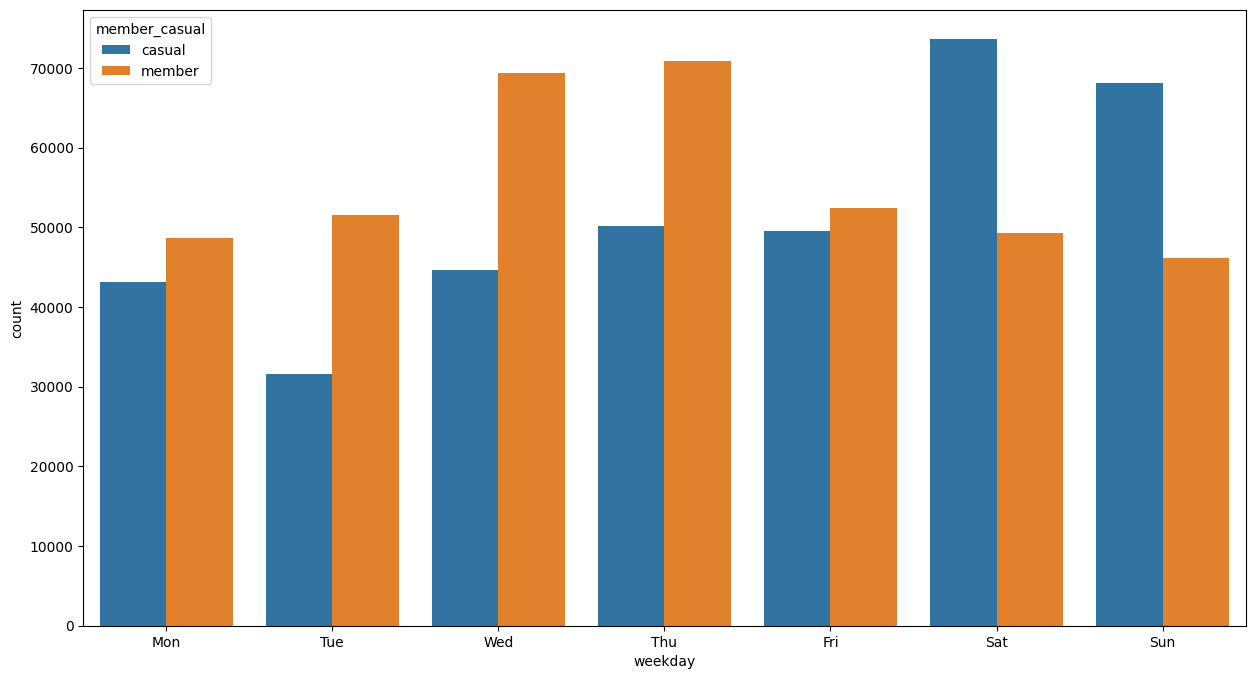

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
sns.countplot(data=sample_df, x='weekday', hue='member_casual')
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);


From this observation, it appears that on weekdays, members tend to be more active compared to casual users. Conversely, during weekends, there seems to be a higher level of activity among casual users than members.

### Pipeline to process monthly data

In [ ]:
def process_data(df):
    '''
    Input :
            df : dataframe containing raw data
    '''

    df['started_at'] = pd.to_datetime(df.started_at)
    df['ended_at'] = pd.to_datetime(df.ended_at)

    df['ride_duration_seconds'] = (df.ended_at - df.started_at) / np.timedelta64(1, 's')

    df = df[df['end_lat'].isnull() == False]
    df = df[df['ride_duration_seconds'] > 0]

    df['ride_distance_miles'] = Haversine(df['end_lat'], df['end_lng'], df['start_lat'], df['start_lng'])
    df['ride_average_speed_mph'] = df['ride_distance_miles'] / (df['ride_duration_seconds'] / 3600)

    df = df[df['ride_average_speed_mph'] <= 40.00]

    df['weekday'] = df['started_at'].dt.weekday
    df['month'] = df['started_at'].dt.month

    return df

## Classification

###Mutual Information

Mutual information measures the interdependence between two variables by quantifying the information gained about one variable when the value of the other variable is known. High mutual information signifies a stronger association between the variables, indicating that changes in one convey more information about the other. For example, if A and B are independent, then knowing A does not give any information about B and vice versa, so their mutual information is zero.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
features = sample_df[['rideable_type', 'start_lat', 'start_lng', 'end_lat',
                 'end_lng', 'ride_duration_seconds', 'ride_distance_miles',
                 'ride_average_speed_mph', 'weekday', 'month']]
target = sample_df['member_casual']

for colname in features.select_dtypes("object"):
    features[colname], _ = features[colname].factorize()

discrete_features = features.dtypes == int

mi_scores = mutual_info_classif(features,target,discrete_features=discrete_features)

mi_scores = pd.Series(mi_scores, name="MI Scores",index=features.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

ride_average_speed_mph    0.086372
ride_distance_miles       0.075699
ride_duration_seconds     0.047247
end_lat                   0.041231
end_lng                   0.040721
rideable_type             0.039267
start_lat                 0.038587
start_lng                 0.037009
weekday                   0.014858
month                     0.000000
Name: MI Scores, dtype: float64

### Using Pipeline to preprocess monthly data

In [ ]:
def merge_csvs_in_folder(folder_path):

    # Get a list of CSV files in the folder
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    dfs = []
    # Read each CSV file and append its DataFrame to the list
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        dfs.append(df)

    # Merge all DataFrames into a single DataFrame
    merged_df = pd.concat(dfs, ignore_index=True)

    return merged_df

In [ ]:
path = '/content/divvy_trip_data_2023'
df = merge_csvs_in_folder(path)
processed_df = process_data(df)

In [ ]:
print("Before Processing : ",df.shape)
print("After Processing : ",processed_df.shape)

Before Processing :  (4596173, 14)
After Processing :  (4578894, 18)


For confirmation calculating mutual scores again on entire 2023 data

In [ ]:
features = processed_df[['rideable_type', 'start_lat', 'start_lng', 'end_lat',
                 'end_lng', 'ride_duration_seconds', 'ride_distance_miles',
                 'ride_average_speed_mph', 'weekday', 'month']]
target = processed_df['member_casual']

for colname in features.select_dtypes("object"):
    features[colname], _ = features[colname].factorize()

discrete_features = features.dtypes == int

mi_scores = mutual_info_classif(features,target,discrete_features=discrete_features)

mi_scores = pd.Series(mi_scores, name="MI Scores",index=features.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

ride_distance_miles       0.056917
ride_average_speed_mph    0.040355
end_lng                   0.039563
end_lat                   0.037781
start_lng                 0.035340
start_lat                 0.034288
ride_duration_seconds     0.028209
rideable_type             0.017803
weekday                   0.009541
month                     0.009359
Name: MI Scores, dtype: float64

Why we can't do Classification on this dataset ?

--> from the results of mutual score,we can infer that there is no such feature which can help us distinguish between member riders and casual riders

## Time Series

###Data Preparation



As previously mentioned, the dataset comprised over 25 million records. To transform this vast dataset into a suitable format for time series analysis, we implemented a series of functions. Consequently, the original 25 million+ records were condensed and converted into approximately 3600 records, optimizing the data for time series analysis.

In [ ]:
import pandas as pd

def rides_per_day_dataframe(raw_data):
    '''
    This function takes raw csv of divvy dataset as input and gives back a dataframe
      Input : raw_data
              raw data in a data frame format
    '''
    # Defining all possible column names for start time as the data span over 10 years different names were being used to represent same data
    possible_start_columns = ['started_at', 'startat','start_time','01 - Rental Details Rental ID','01 - Rental Details Local Start Time','starttime']
    existing_start_columns = [col for col in possible_start_columns if col in raw_data.columns]

    # If none of the possible columns exist, return None
    if not existing_start_columns:
        return None

    # Select the first available start time column
    start_time_column = existing_start_columns[0]

    # Convert the start time column to datetime format if it's not already
    raw_data[start_time_column] = pd.to_datetime(raw_data[start_time_column], errors='coerce')

    # Drops rows with missing start time values, if any
    raw_data = raw_data.dropna(subset=[start_time_column])

    # Create a new column with just the date
    raw_data['date'] = raw_data[start_time_column].dt.date

    # Group by date and count the number of rides on each date
    rides_per_day = raw_data.groupby('date').size().reset_index(name='number_of_rides')

    # Set 'date' column as index
    rides_per_day.set_index('date', inplace=True)

    return rides_per_day



In [ ]:
# csv reader
import os
import pandas as pd

def read_csvs_and_combine(folder_path):
    # Gets a list of all files in the folder that end with '.csv'
    file_list = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    # Initialize an empty DataFrame to store the combined data
    combined_df = pd.DataFrame()

    # Loop through each file in the folder
    for file in file_list:
        # Read the CSV file
        file_path = os.path.join(folder_path, file)
        data = pd.read_csv(file_path)

        # Call the function to get the number of rides per day for this file's data
        rides_data = rides_per_day_dataframe(data)

        # Append the data to the combined DataFrame
        combined_df = pd.concat([combined_df, rides_data])

    # Combine all the data into one DataFrame
    divvy_trip_data_timeseries_df = combined_df.groupby(combined_df.index).sum()

    return divvy_trip_data_timeseries_df

In [ ]:
# folder_path = '/content/Raw_Csvs'     # name of folder in which raw csvs are uploaded
# divvy_timeseries_data_df = read_csvs_and_combine(folder_path)
# divvy_timeseries_data_df


In [ ]:
# to download and save the csv and avoid re computing everytime

# from google.colab import files
# divvy_timeseries_data_df.to_csv('divvy_timeseries_data.csv',index=True)
# files.download('divvy_timeseries_data.csv')

In [ ]:
## when a new session starts load that csv instead of recreating that again

divvy_timeseries_data_df = pd.read_csv('/content/divvy_ts_all_data.csv')
divvy_timeseries_data_df['date'] = pd.to_datetime(divvy_timeseries_data_df['date'])
divvy_timeseries_data_df.set_index('date', inplace=True)

<Axes: xlabel='date'>

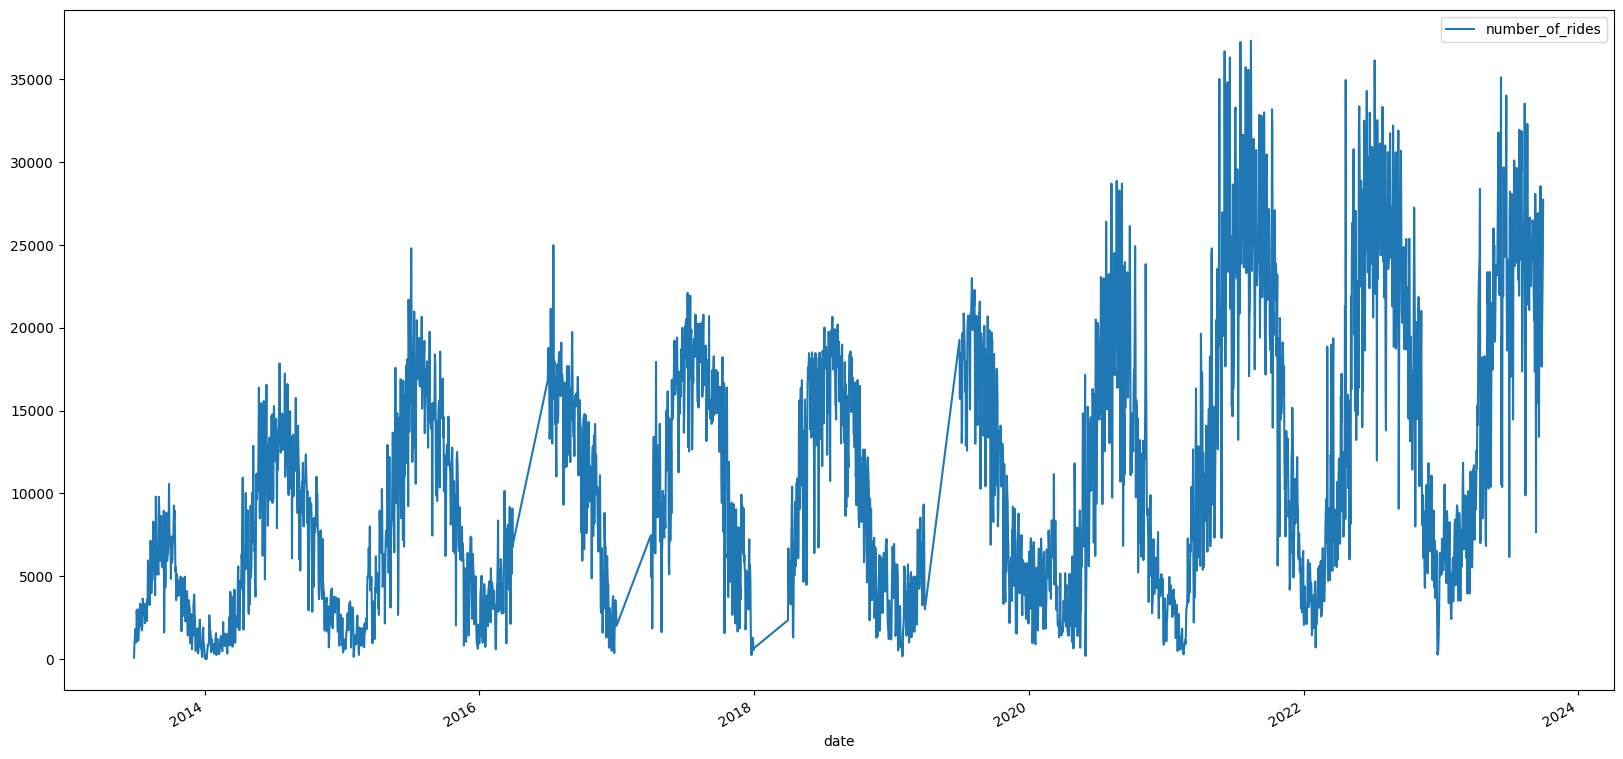

In [ ]:
divvy_timeseries_data_df.plot(figsize=(20,10))

here we can see, there is a trend and we can do forecast


for forcasating we are trying to use 3 different models

### PROPHET



FBProphet/Prophet is open source software released by Facebook’s Core Data Science team.
FBProphet is a powerful time series forecasting algorithm that can capture complex patterns in the data such as seasonality, trends, and the effect of holidays. It is based on a Bayesian approach that allows for uncertainty estimation in the predictions.
https://facebook.github.io/prophet/

In [ ]:
# !pip install prophet
from prophet import Prophet

In [ ]:
df_train = pd.read_csv('/content/divvy_ts_all_data.csv')
df_train.head()

,date,number_of_rides
0,6/27/2013,95
1,6/28/2013,897
2,6/29/2013,1201
3,6/30/2013,1812
4,7/1/2013,1559


**Univariate Forecasting**

The term "univariate time series" refers to a time series that consists of single observation recorded sequentially over equal time increments.

In [ ]:
df_train = df_train.rename(columns={'number_of_rides':'y','date':'ds'})
df_train['y_orig'] = df_train['y']
df_train['y'] = np.log(df_train['y'])
df_train.tail()

,ds,y,y_orig
3377,9/26/2023,9.779227,17663
3378,9/27/2023,9.899178,19914
3379,9/28/2023,10.019135,22452
3380,9/29/2023,10.076600,23780
3381,9/30/2023,10.230162,27727


In [ ]:
model = Prophet()
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ykvj8p_/niek4gsg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ykvj8p_/95am7_sj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67009', 'data', 'file=/tmp/tmp2ykvj8p_/niek4gsg.json', 'init=/tmp/tmp2ykvj8p_/95am7_sj.json', 'output', 'file=/tmp/tmp2ykvj8p_/prophet_modelzhhnmf_y/prophet_model-20231209144559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:45:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# how many days in future we want to predict specify in periods, frequency daily so D
future_data = model.make_future_dataframe(periods=365*2, freq = 'D')
forecast_data = model.predict(future_data)

In [ ]:
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4107,2025-09-25,10.194800,9.405814,10.925487
4108,2025-09-26,10.201810,9.429394,10.968981
4109,2025-09-27,10.108466,9.388912,10.869927
4110,2025-09-28,9.946323,9.203443,10.659306
4111,2025-09-29,10.114329,9.373739,10.833898


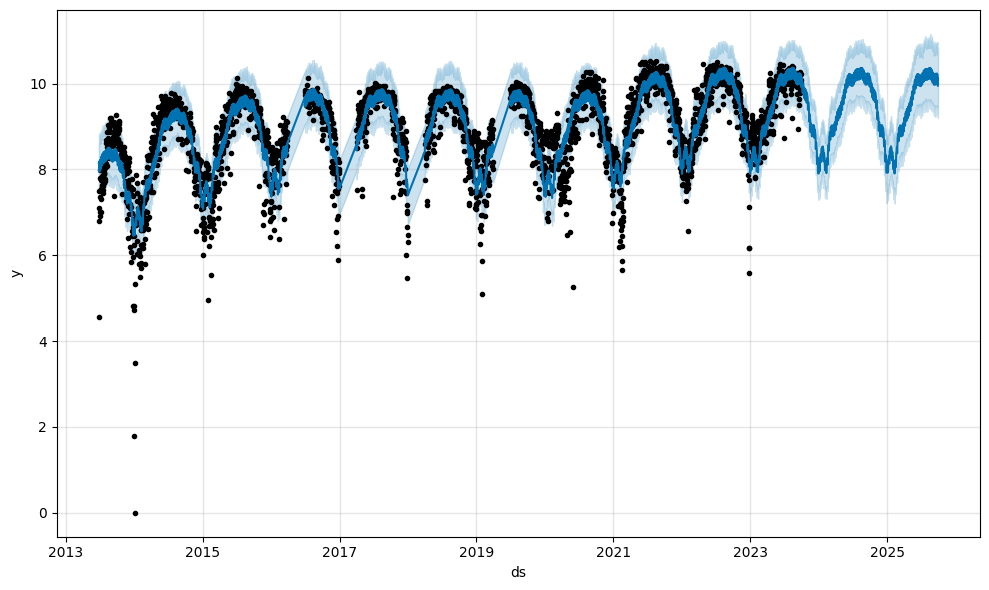

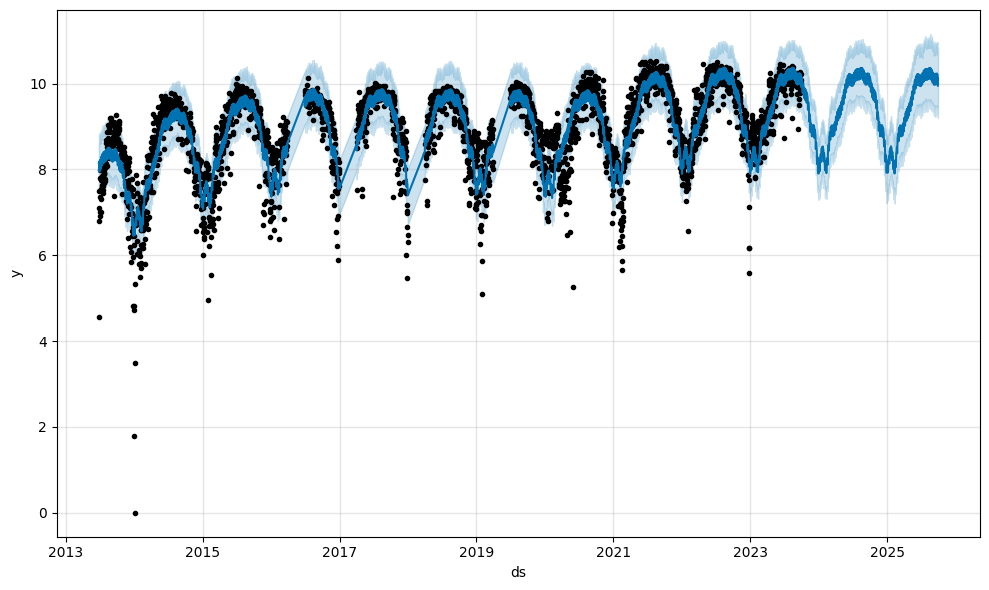

In [ ]:
model.plot(forecast_data)

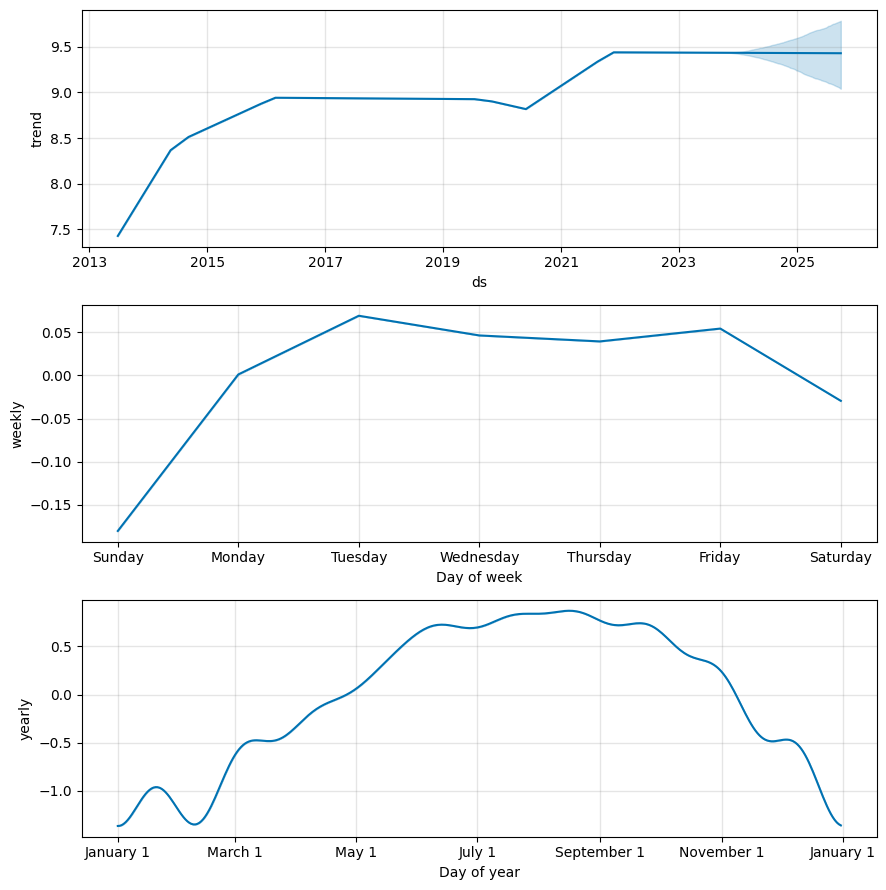

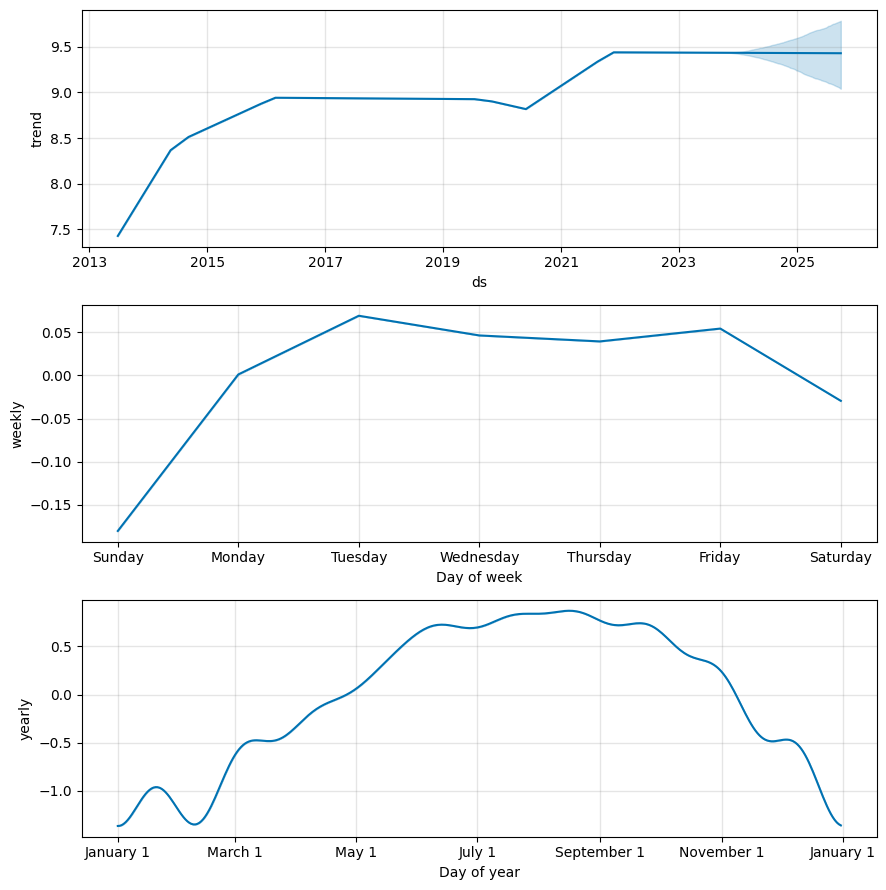

In [ ]:
model.plot_components(forecast_data)

In [ ]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

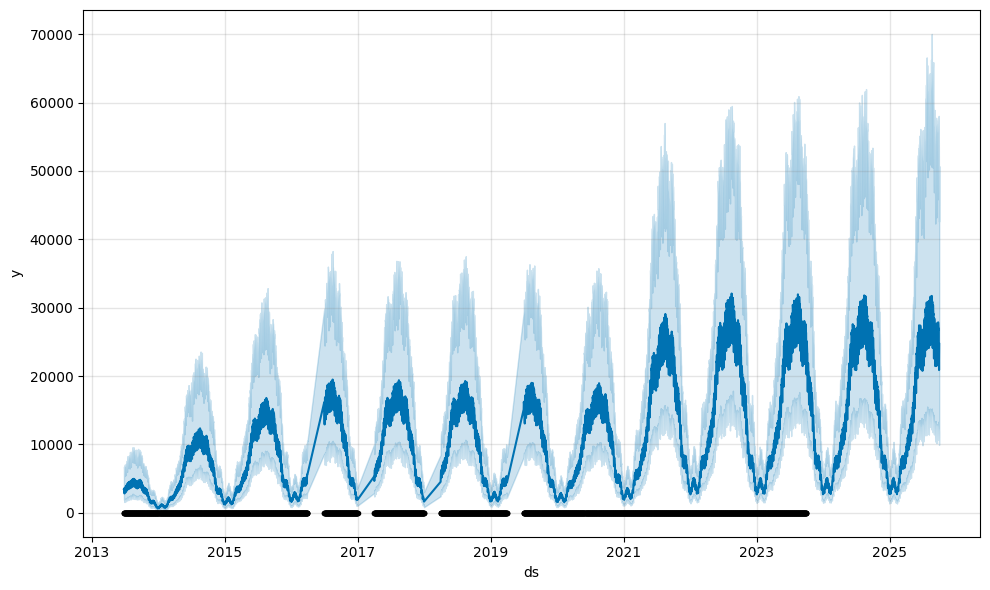

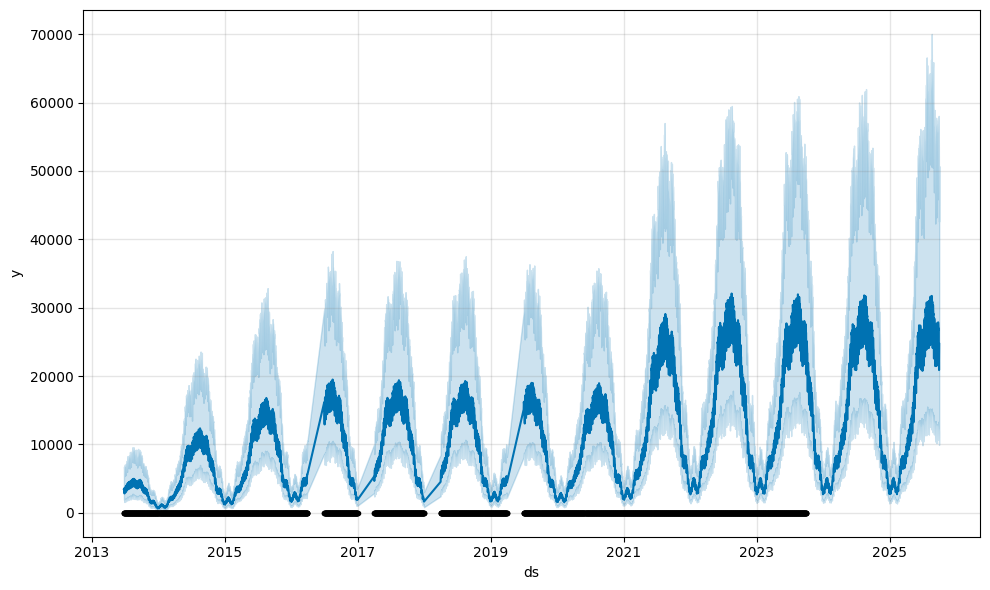

In [ ]:
model.plot(forecast_data_orig)

<Axes: >

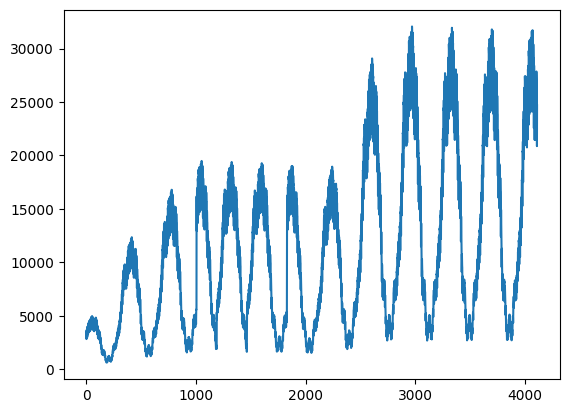

In [ ]:
forecast_data_orig['yhat'].plot()

<Axes: >

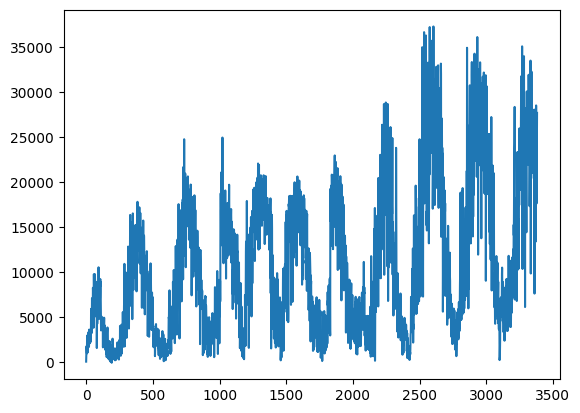

In [ ]:
df_train['y_orig'].plot()

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

actual_chart = go.Scatter(y=df_train['y_orig'], name= 'Actual')
predict_chart = go.Scatter(y=forecast_data_orig['yhat'], name= 'Predicted')
py.plot([actual_chart, predict_chart])

'temp-plot.html'

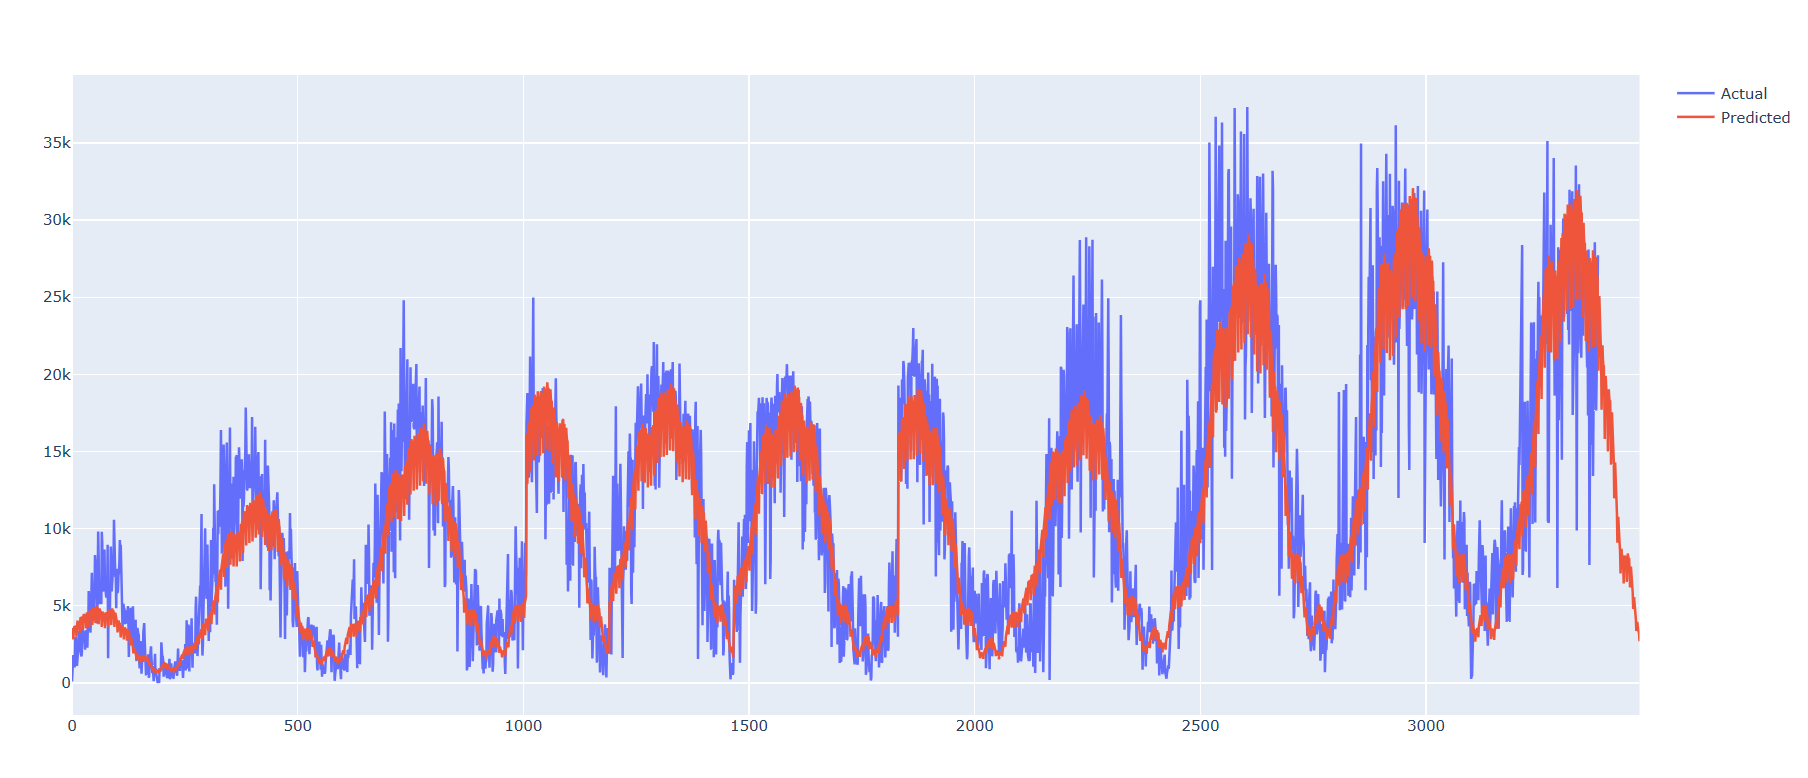

In [ ]:
#Ploted predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train['y_orig'], name= 'Actual')
predict_chart = go.Scatter(y=forecast_data_orig['yhat'], name= 'Predicted')
predict_chart_upper = go.Scatter(y=forecast_data_orig["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=forecast_data_orig["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

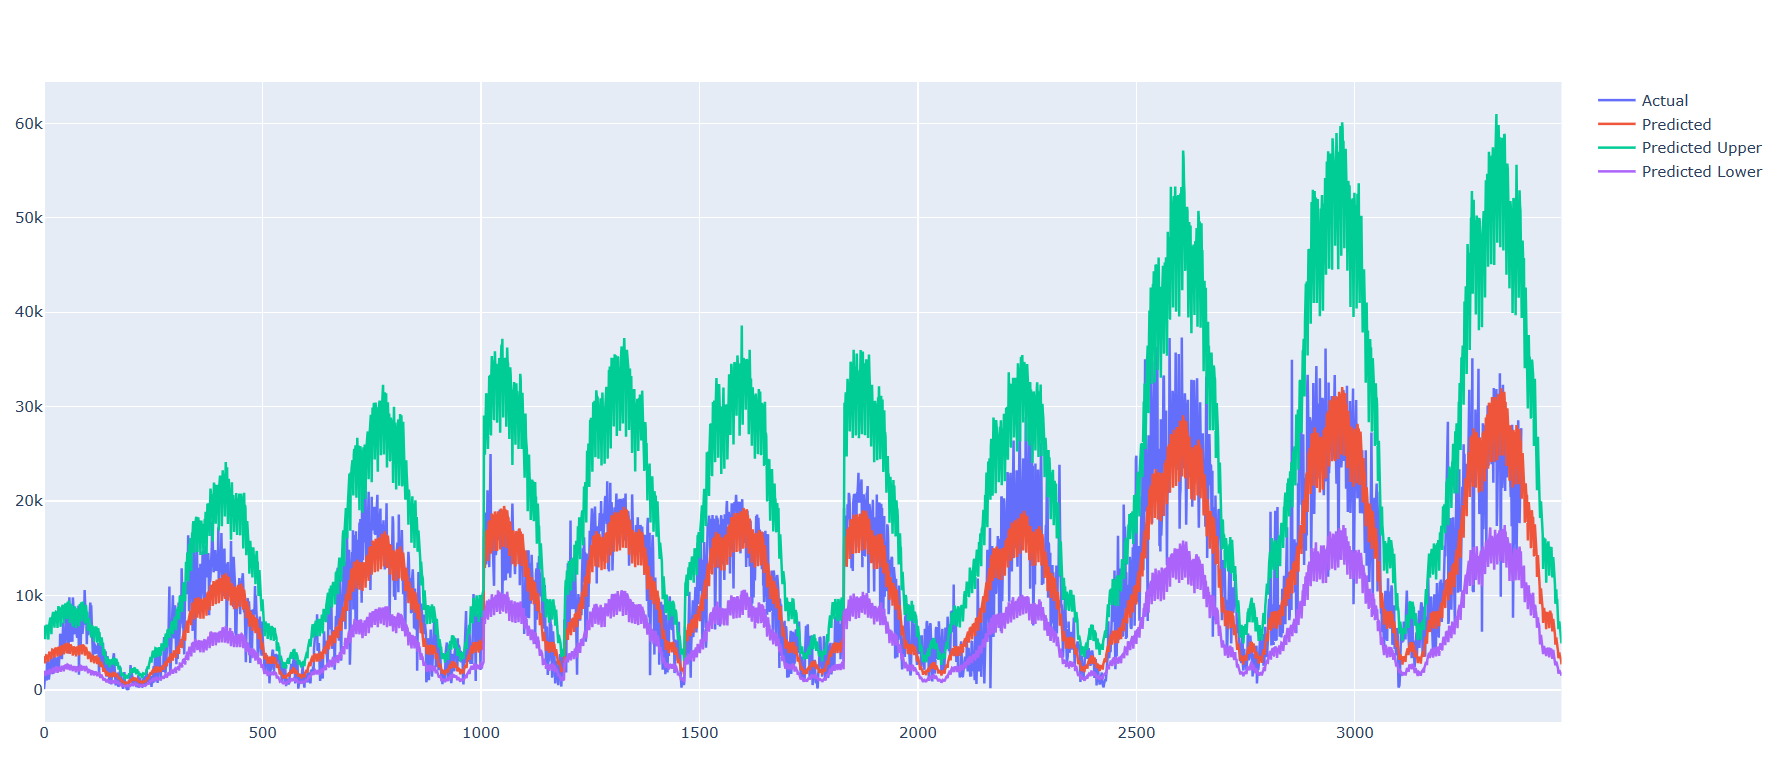

###SARIMA




SARIMA

(Seasonal Autoregressive Integrated Moving Average) is a statistical technique used for forecasting time series data, a series of observations recorded at regular intervals over time. SARIMA models are a combination of autoregressive (AR) models, moving average (MA) models, and differencing.

Link to official documentation:
https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html


In [ ]:
# divvy_timeseries_data_df = pd.read_csv('/content/divvy_ts_all_data.csv')
# divvy_timeseries_data_df['date'] = pd.to_datetime(divvy_timeseries_data_df['date'])
# divvy_timeseries_data_df.set_index('date', inplace=True)

**What is stationarity in data and why is it important?**

A Stationary series is one whose statistical properties such as mean, variance, covariance, and standard deviation do not vary with time, or these stats properties are not a function of time. In other words, stationarity in Time Series also means series without a Trend or Seasonal components. To achieve stationarity, common techniques include differencing, detrending, or transforming the data.

The AR and MA components of SARIMA models assume that the time series is stationary. If the data is non-stationary, the autocorrelation and moving average patterns may not be consistent across time, leading to unreliable model estimates.

Augmented Dickey Fuller test ( ADF Test) is a common statistical test used to test whether a given Time series is stationary or not . Stationary data is time series data where the mean and variance don't change over time. Data is considered non-stationary if it has a strong trend or seasonality.

In [ ]:
#Ho: It is non stationary, rejecting null hypothesis
#H1:  It is stationary,Alternate hypothesis
from statsmodels.tsa.stattools import adfuller

# Performing Augmented Dickey-Fuller test
adf_test = adfuller(divvy_timeseries_data_df['number_of_rides'])

# Display the ADF test results
adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_output[f'Critical Value ({key})'] = value

adf_output

Test Statistic                   -3.183488
p-value                           0.020961
#Lags Used                       29.000000
Number of Observations Used    3352.000000
Critical Value (1%)              -3.432302
Critical Value (5%)              -2.862403
Critical Value (10%)             -2.567229
dtype: float64

The p-value is about 0.021, which is less than the common significance level of 0.05. This suggests that we can reject the null hypothesis of the ADF test, indicating that the time series is likely stationary. The Test Statistic is smaller than the Critical Values at 1%, 5%, and 10% levels, which further supports the rejection of the null hypothesis.

Differencing

From the Augmented Dickey-Fuller (ADF) test we conducted earlier, the data appeared to be stationary, as indicated by the test statistic being less than the critical values and a low p-value. Therefore, it might not be necessary to difference the data for stationarity.

The AutoCorrelation Function (ACF) and Partial AutoCorrelation Function (PACF) plots provide insights into potential parameters for the SARIMA model:

ACF Plot: Shows the correlation of the time series with its lags. The gradual decline in the ACF plot suggests a potential MA (Moving Average) component.

PACF Plot: Indicates the partial correlation of the series with its lags. The sharp cut-off after the first few lags in the PACF plot could imply an AR (AutoRegressive) component.

In ARIMA model we need to give three values: p,d,q

p specifies AR model lags

d is differencing

q is moving average lags

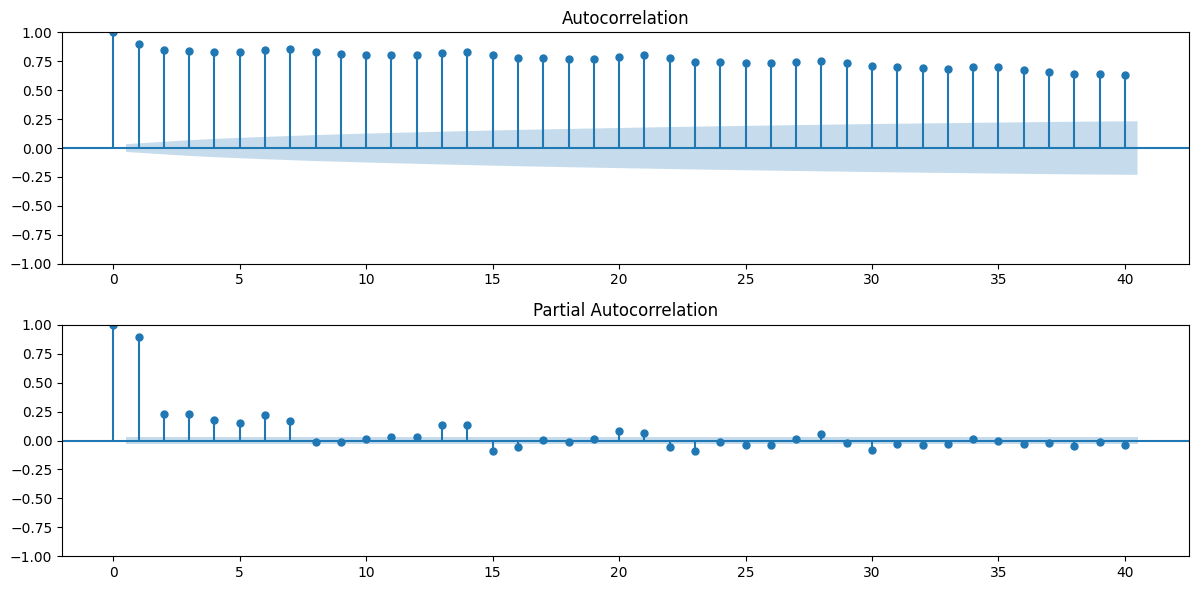

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(divvy_timeseries_data_df['number_of_rides'], ax=plt.gca(), lags=40)

plt.subplot(212)
plot_pacf(divvy_timeseries_data_df['number_of_rides'], ax=plt.gca(), lags=40)

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fitting the SARIMA model with the specified parameters
model = SARIMAX(divvy_timeseries_data_df['number_of_rides'],
                order=(1, 0, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# Summary of the model
model_summary = results.summary()
model_summary


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    number_of_rides   No. Observations:                 3382
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood              -32167.917
Date:                            Sat, 09 Dec 2023   AIC                          64345.833
Time:                                    14:47:31   BIC                          64376.426
Sample:                                         0   HQIC                         64356.775
                                           - 3382                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9914      0.004    249.780      0.000       0.984       0.999
ma.L1         -0.6905      0.018    -38.059      0.000      -0.726      -0.655
ar.S.L12      -0.0734      0.029     -2.560      0.010      -0.130      -0.017
ma.S.L12      -0.9898      0.008   -117.568      0.000      -1.006      -0.973
sigma2      1.967e+07   1.73e-10   1.14e+17      0.000    1.97e+07    1.97e+07
===================================================================================
Ljung-Box (L1) (Q):                 127.83   Jarque-Bera (JB):              2315.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.03   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.03e+32. Standard errors may be unstable.
"""

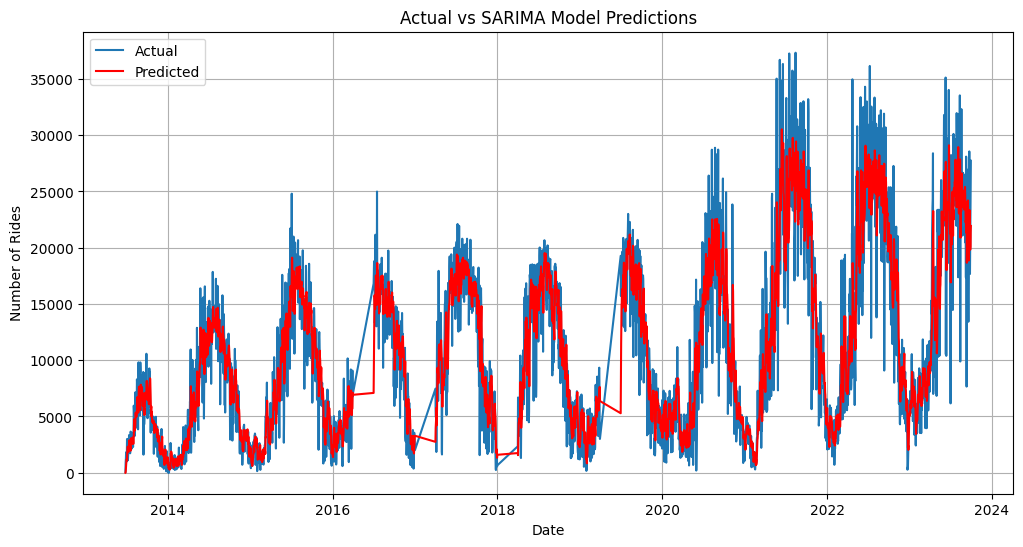

In [ ]:
# Generating in-sample predictions
predictions = results.get_prediction(start=pd.to_datetime('2013-06-27'), dynamic=False)
predictions_mean = predictions.predicted_mean

# Plotting the observed data and the in-sample predictions
plt.figure(figsize=(12, 6))
plt.plot(divvy_timeseries_data_df.index, divvy_timeseries_data_df['number_of_rides'], label='Actual')
plt.plot(divvy_timeseries_data_df.index, predictions_mean, label='Predicted', color='r')
plt.title('Actual vs SARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.legend()
plt.grid(True)
plt.show()

Based on the plot, the model seems to have captured the overall trends and seasonality of the data quite well.

###VAR

Vector Autoregression (VAR) is a forecasting algorithm that can be used when two or more time series influence each other. It is considered as an Autoregressive model because, each variable (Time Series) is modeled as a function of the past values, that is the predictors are nothing but the lags (time delayed value) of the series.

multivariate

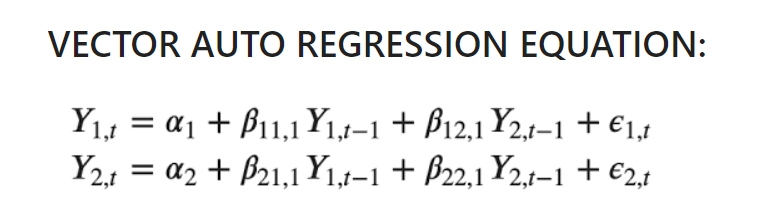

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller, kpss
from tqdm import tqdm_notebook
from itertools import product
import statsmodels.api as sm


In [ ]:
macro_data = pd.read_csv('/content/202102-divvy-tripdata.csv')
macro_data = process_data(macro_data)
print(macro_data.shape)
print(macro_data.columns)

(49377, 18)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_duration_seconds', 'ride_distance_miles',
       'ride_average_speed_mph', 'weekday', 'month'],
      dtype='object')


In [ ]:
macro_data = macro_data[[ 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_duration_seconds', 'ride_distance_miles',
       'ride_average_speed_mph', 'weekday', 'month']]
macro_data.set_index(macro_data['started_at'].dt.date, inplace=True)
macro_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49377 entries, 2021-02-12 to 2021-02-04
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   rideable_type           49377 non-null  object        
 1   started_at              49377 non-null  datetime64[ns]
 2   ended_at                49377 non-null  datetime64[ns]
 3   start_station_name      45339 non-null  object        
 4   start_station_id        45339 non-null  object        
 5   end_station_name        44259 non-null  object        
 6   end_station_id          44259 non-null  object        
 7   start_lat               49377 non-null  float64       
 8   start_lng               49377 non-null  float64       
 9   end_lat                 49377 non-null  float64       
 10  end_lng                 49377 non-null  float64       
 11  member_casual           49377 non-null  object        
 12  ride_duration_seconds   49377 non-nul

In [ ]:
adfuller_result_1 = adfuller(macro_data['ride_average_speed_mph'].diff()[1:])

In [ ]:
print("Ride Speed")
print("test statistic",adfuller_result_1[0])
print("p-value",adfuller_result_1[1])

Ride Speed
test statistic -45.34594365334778
p-value 0.0


In [ ]:
adfuller_result_2 = adfuller(macro_data['ride_distance_miles'].diff()[1:])

In [ ]:
print("Ride Distance")
print("test statistic",adfuller_result_2[0])
print(" p-value",adfuller_result_2[1])

Ride Distance
test statistic -46.33531157251489
 p-value 0.0


In [ ]:
adfuller_result_3 = adfuller(macro_data['ride_duration_seconds'].diff()[1:])

In [ ]:
print("Ride Duration")
print("test statistic",adfuller_result_3[0])
print(" p-value",adfuller_result_3[1])

Ride Duration
test statistic -49.043828737224565
 p-value 0.0


In [ ]:
micro_data = macro_data[['ride_duration_seconds','ride_average_speed_mph']]

In [ ]:
train_df=micro_data[:-20000]
test_df=micro_data[-20000:]

In [ ]:
print(train_df.shape)
print(test_df.shape)

(29377, 2)
(20000, 2)


In [ ]:
model = VAR(train_df.diff()[1:])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.



In [ ]:
sorted_order=model.select_order(maxlags=10)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        22.48       22.48   5.800e+09       22.48
1        21.93       21.94   3.358e+09       21.94
2        21.75       21.75   2.781e+09       21.75
3        21.64       21.65   2.508e+09       21.64
4        21.58       21.58   2.350e+09       21.58
5        21.54       21.54   2.254e+09       21.54
6        21.50       21.51   2.180e+09       21.50
7        21.48       21.49   2.126e+09       21.48
8        21.46       21.47   2.087e+09       21.46
9        21.44       21.45   2.056e+09       21.45
10      21.43*      21.44*  2.033e+09*      21.44*
--------------------------------------------------


A lower AIC value indicates a better fit which is at 10th lag.

In [ ]:
var_model = VARMAX(train_df, order=(10,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.



                                            Statespace Model Results                                           
Dep. Variable:     ['ride_duration_seconds', 'ride_average_speed_mph']   No. Observations:                29377
Model:                                                         VAR(10)   Log Likelihood             -396232.259
                                                           + intercept   AIC                         792554.519
Date:                                                 Sat, 09 Dec 2023   BIC                         792927.477
Time:                                                         14:51:31   HQIC                        792674.306
Sample:                                                              0                                         
                                                               - 29377                                         
Covariance Type:                                                   opg                                  

In [ ]:
from datetime import timedelta
predict = fitted_model.get_prediction(start=train_df.index[0],end=train_df.index[-1] + timedelta(days=8))
predictions=predict.predicted_mean
predictions.columns=['ride_duration_seconds','ride_average_speed_mph']
predictions


,ride_duration_seconds,ride_average_speed_mph
started_at,,
2021-02-12,1393.385536,5.613079
2021-02-14,1396.080410,5.545982
2021-02-09,1266.623714,4.560946
2021-02-02,1618.064921,4.102257
2021-02-23,2053.234554,5.153485
2021-02-24,1581.033135,4.808393
2021-02-01,1482.131208,5.286245
2021-02-11,1125.715176,4.116267
2021-02-27,1584.819508,3.631663


##Conclusion

We explored different types of supervised models including classification and regression. But according to our research and trials, time series forecasting was the most beneficial and insightful. Therefore, we tried to extend this use case to perform multivariate analysis as well.




What Sets Our Project Apart from Existing Endeavors on This Dataset?
- While many existing projects primarily focus on exploratory data analysis (EDA) and descriptive analytics, our approach marks a significant departure. We are pioneering the application of predictive modeling techniques to extract deeper insights and forecast trends from the data.

- A critical aspect that sets our project apart is the scale and depth of the dataset utilized. Unlike prior projects that typically rely on limited time spans, often ranging from a few months to a maximum of 3-4 years, we harnessed the entirety of a vast dataset spanning 10 years. This extensive dataset comprises over 25 million records, enabling us to conduct thorough time series analysis with a broader historical perspective.



Limitations and Future Plan:
- Throughout our time series analysis, our objective was to develop a model capable of forecasting or approximating ride duration based on specific parameters: the user type unlocking a bike from a particular station at a given date and time. Such a model could significantly aid in directing availability and enhancing the optimization of shared bike usage. Our initial approach involved grouping records by date, time, start station, and user type (casual/member). However, due to constraints in computational resources, we faced limitations in completing this process. As a solution, we have devised a plan to segment this task into manageable parts, similar to our data preparation strategy for the time series analysis, and aim to address it in the near future.